<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


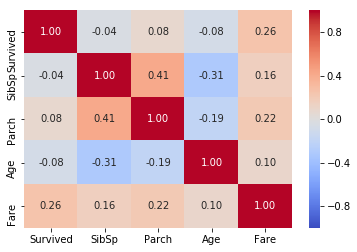

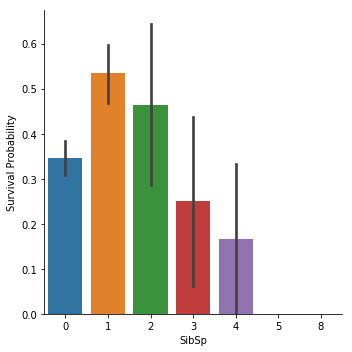

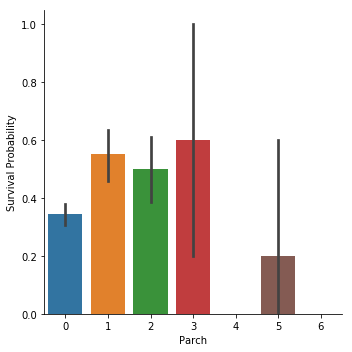

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


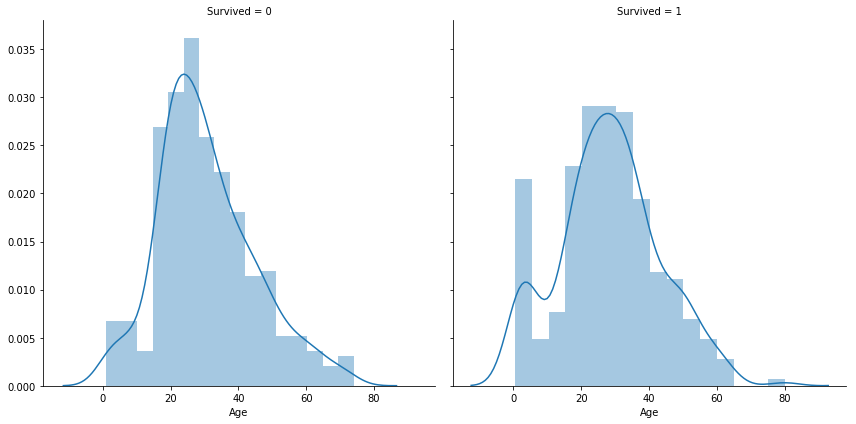

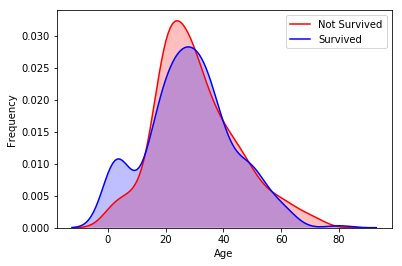

D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


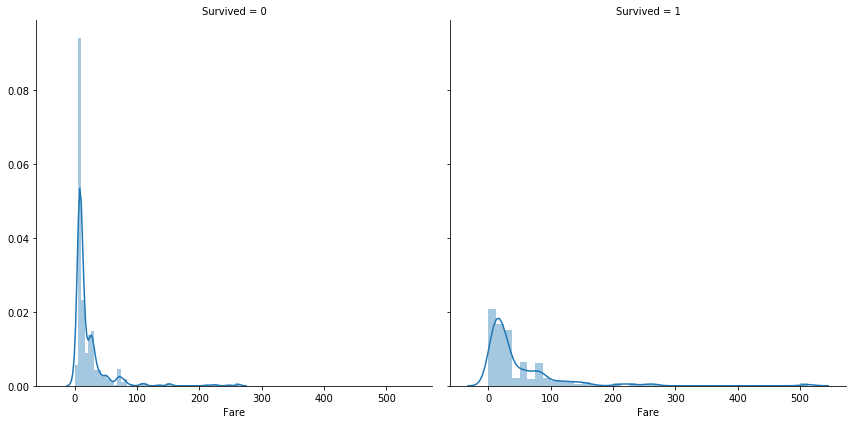

4.787316519674893
Survived
0    4.553140
1    3.862779
Name: Fare, dtype: float64


D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Balmeet\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


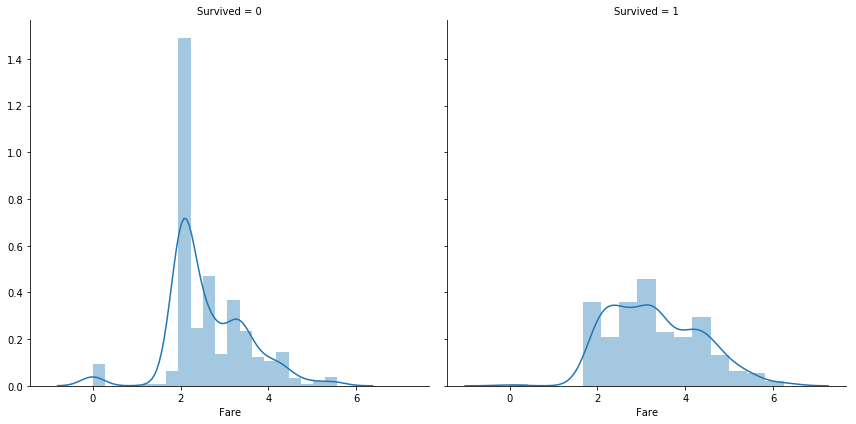

0.44310881405404506
Survived
0    0.332467
1    0.412114
Name: Fare, dtype: float64


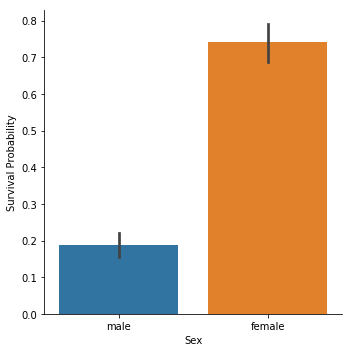

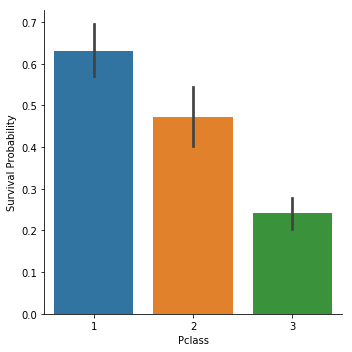

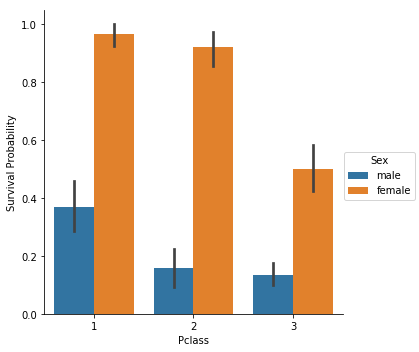

2
0
0


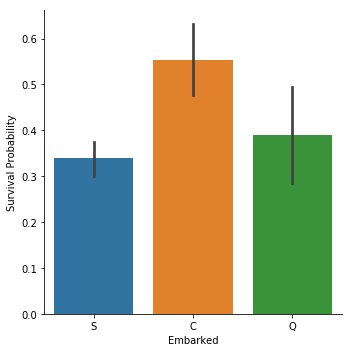

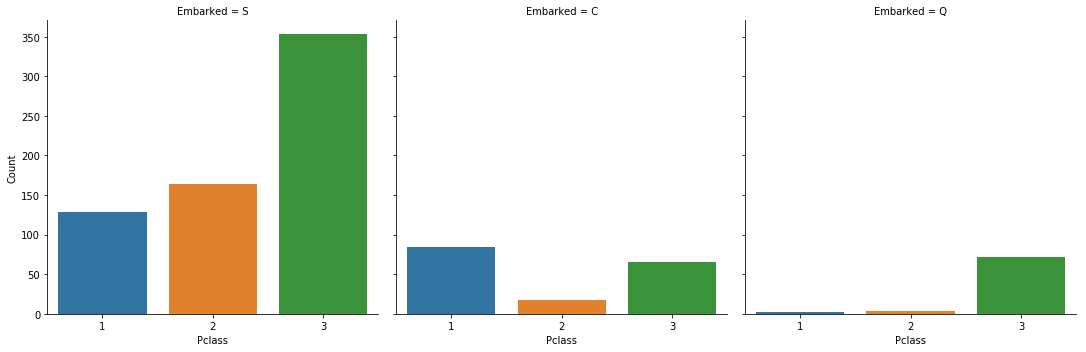

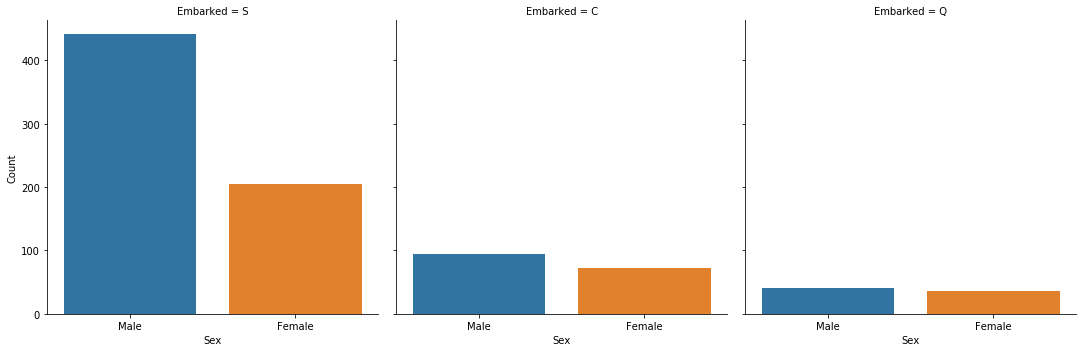

177
86


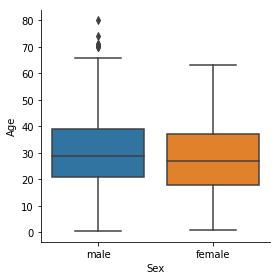

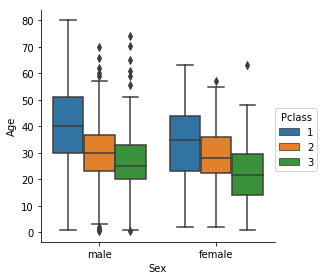

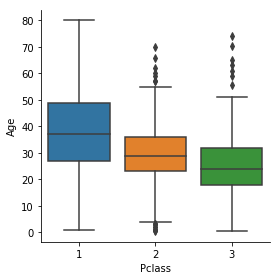

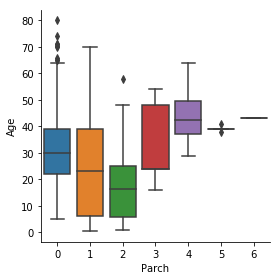

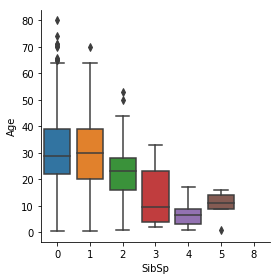

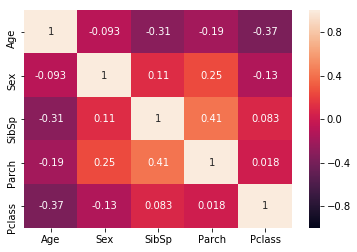

D:\Balmeet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0
0


In [9]:
%run "Titanic_ML Data Analysis and Cleaning.ipynb"

In [10]:
# Create a function to clean the train and test Dataframes

def clean_df(df):
    ages = df["Age"]
    fares = df["Fare"]
    df['cleaned_age'] = ages.fillna(ages.mean())
    df = df.drop(['Cabin'], axis=1)
    df = df.dropna(subset=['Embarked'])
    df['cleaned_fare'] = fares.fillna(fares.mean())
    return df
train = clean_df(train)
test = clean_df(test)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
cleaned_age     891 non-null float64
cleaned_fare    891 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket       

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cleaned_age,cleaned_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,S,22.0,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C,38.0,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,S,26.0,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,S,35.0,3.972177
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,S,35.0,2.085672


Now that we have cleaned columns, we can choose the features to be used for the model.

In [12]:
cols = train[['Pclass','Sex', 'cleaned_age','cleaned_fare']].columns
cols

Index(['Pclass', 'Sex', 'cleaned_age', 'cleaned_fare'], dtype='object')

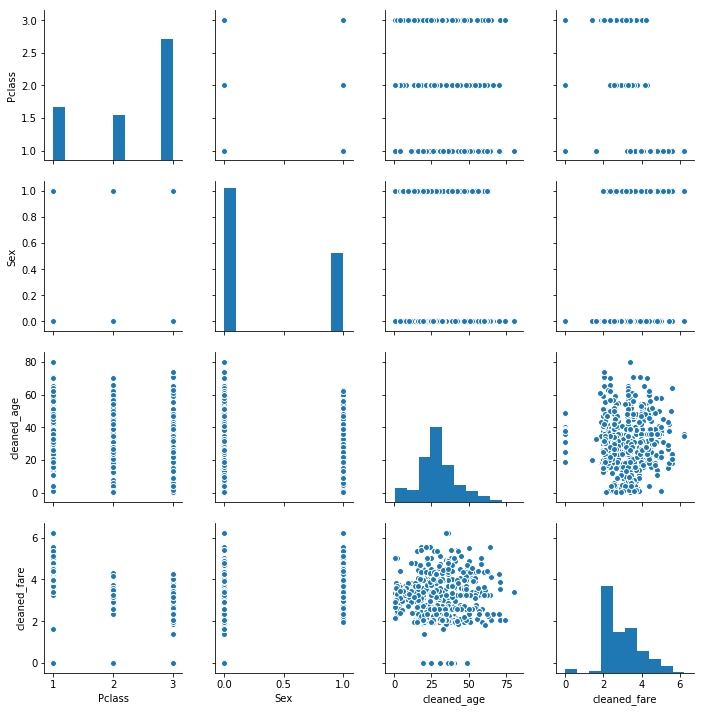

In [13]:
sns.pairplot(train[cols])

In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

features = train[cols]
target = train['Survived']
test_features = test[cols]

rfc = RandomForestClassifier(random_state=1)
scores = cross_val_score(rfc, features, target, cv=10)
accuracy = np.mean(scores)
accuracy

0.8284241289297469

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            418 non-null float64
Embarked        418 non-null object
cleaned_age     418 non-null float64
cleaned_fare    418 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 42.5+ KB


In [16]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(features, target)
test_predictions = rfc.predict(test_features)

In [17]:
test_ids = test['PassengerId']
submission_df = {"PassengerId":test_ids,
                "Survived":test_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submissions/submission.csv",index=False)